### 1. Carregar o CSV:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("estoque.csv")

df

,Data_Atualizacao,Produto,Categoria,Quantidade,Preco_Unitario
0,29/03/2023,Monitor,Eletrônicos,97,398.63
1,30/08/2023,Desodorante,Higiene,45,272.30
2,07/12/2023,Arroz,Alimentos,34,487.97
3,15/07/2023,Sabão em Pó,Limpeza,181,419.03
4,14/08/2023,Notebook,Eletrônicos,87,458.93
...,...,...,...,...,...
595,22/07/2023,Teclado,Eletrônicos,30,373.67
596,04/07/2023,Detergente,Limpeza,145,245.53
597,26/07/2023,Sabão em Pó,Limpeza,97,456.52
598,21/12/2023,Esponja,Limpeza,39,242.94


### 2. Calcular o valor total por produto

In [5]:
# Crie uma nova coluna chamada Valor_Estoque, que representa o valor total do produto em estoque (Quantidade * Preco_Unitario).
df['Valor_Estoque'] = df['Quantidade'] * df['Preco_Unitario']
print(df)

# Agrupe os dados por Produto e calcule o valor total de estoque para cada um.
agrupamento = df.groupby('Produto')['Valor_Estoque'].sum().reset_index() # Sem o reset_index, não aparece indice
print(agrupamento)

    Data_Atualizacao      Produto    Categoria  Quantidade  Preco_Unitario  \
0         29/03/2023      Monitor  Eletrônicos          97          398.63   
1         30/08/2023  Desodorante      Higiene          45          272.30   
2         07/12/2023        Arroz    Alimentos          34          487.97   
3         15/07/2023  Sabão em Pó      Limpeza         181          419.03   
4         14/08/2023     Notebook  Eletrônicos          87          458.93   
..               ...          ...          ...         ...             ...   
595       22/07/2023      Teclado  Eletrônicos          30          373.67   
596       04/07/2023   Detergente      Limpeza         145          245.53   
597       26/07/2023  Sabão em Pó      Limpeza          97          456.52   
598       21/12/2023      Esponja      Limpeza          39          242.94   
599       12/05/2023     Macarrão    Alimentos          24          394.30   

     Valor_Estoque  
0         38667.11  
1         12253.50  


### 3. Filtrar produtos com baixo estoque

In [6]:
# Filtre todos os produtos cuja quantidade seja menor que 10 unidades.
# TODO 

# Crie um DataFrame separado com esses produtos para posterior análise.
# TODO 


### 4. Salvar os resultados

In [7]:
# Exporte os produtos com baixo estoque para um novo arquivo CSV chamado estoque_baixo.csv.
# TODO 

# Salve o valor total por produto em uma planilha Excel chamada valor_total_estoque.xlsx, onde cada aba representa uma categoria de produto, com os produtos e seus respectivos valores.
# TODO 

### 5. Identificar o produto mais valioso por categoria

In [8]:
# Para cada categoria, identifique o produto com o maior valor total de estoque.
# Crie um DataFrame contendo: Categoria, Produto, Valor_Estoque.
# TODO 


### 6. Calcular o valor total do estoque por categoria

In [9]:
# Agrupe os dados por Categoria e calcule a soma total de Valor_Estoque de cada categoria
agrupamento3 = df.groupby('Categoria')['Valor_Estoque'].sum().reset_index()
print(agrupamento3, '\n')

# Ordene do maior para o menor.
# TODO 

# Pode ser salvo como CSV ou exibido como gráfico.
# Abordagem usando Gráfico
# TODO 

     Categoria  Valor_Estoque
0    Alimentos     3383136.59
1  Eletrônicos     4477677.37
2      Higiene     4238200.02
3      Limpeza     3804669.34 



### 7.Classificar produtos em faixas de estoque

In [10]:
# Adicione uma nova coluna chamada Nivel_Estoque com base na Quantidade:
# Baixo: Quantidade < 10
# Médio: entre 10 e 50
# Alto: > 50
df["Nivel_Estoque"] = df["Quantidade"].apply(lambda x: "Baixo" if x < 10 else ("Médio" if x <= 50 else "Alto"))

# Faça uma contagem por nível.
print(df.groupby("Nivel_Estoque")["Nivel_Estoque"].count()) # Aqui eu repito [Nivel_Estoque] porque sem ele ele mostra todas as colunas com a contagem

Nivel_Estoque
Alto     462
Baixo     18
Médio    120
Name: Nivel_Estoque, dtype: int64


### 8. Análise temporal

/tmp/ipykernel_41406/2784396136.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Data_Atualizacao'] = pd.to_datetime(df['Data_Atualizacao'])


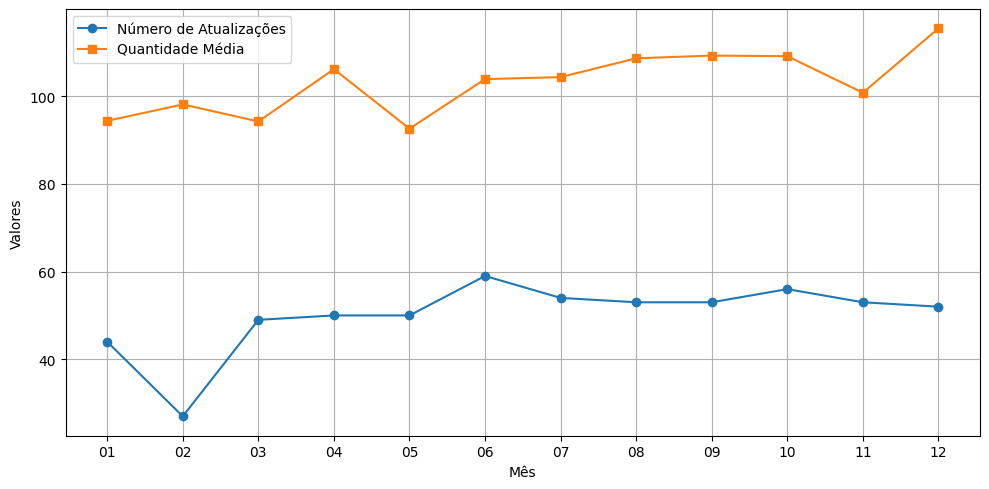

In [11]:
# Converta a coluna Data_Atualizacao para o tipo datetime.
df['Data_Atualizacao'] = pd.to_datetime(df['Data_Atualizacao'])
df['Mes'] = df['Data_Atualizacao'].dt.strftime('%m')  # Criando uma coluna separada pra mês para fazer o agrupamento

# Agrupe por mês (ou trimestre) e calcule:
  # Número de atualizações de estoque
  # Quantidade média dos produtos atualizados
agrupamento_por_mes = df.groupby('Mes').agg({
    'Produto': 'count',
    'Quantidade': 'mean'
}).rename(columns={
    'Produto': 'Num_Atualizacoes',
    'Quantidade': 'Quantidade_Media'
}).reset_index() # Sem o reset index a Coluna Mes não existe

# Gere uma visualização de linha temporal com esses dados.
plt.figure(figsize=(10, 5))
plt.plot(agrupamento_por_mes['Mes'], agrupamento_por_mes['Num_Atualizacoes'], marker='o', label='Número de Atualizações')
plt.plot(agrupamento_por_mes['Mes'], agrupamento_por_mes['Quantidade_Media'], marker='s', label='Quantidade Média')

plt.xlabel('Mês')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()